# Análisis de Componentes Principales (PCA) - Lineal

* Reducción de dimensionalidad lineal que utiliza la **Descomposición en Valores Singulares** de los datos para proyectarlos a un **espacio de menor dimensión**.

* **Documentación de scikit-learn** [scikit-learn Doc](http://scikit-learn.org/stable/modules/decomposition.html#pca)

* **Parámetros de scikit-learn** [scikit-learn Parameters](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA)

* **Creado en 1901** por Karl Pearson.

* Es **Aprendizaje Automático No Supervisado**.

* [Wikipedia](https://en.wikipedia.org/wiki/Principal_component_analysis)

* Procedimiento estadístico que utiliza la tecnología de **[transformación ortogonal](https://en.wikipedia.org/wiki/Orthogonal_transformation)**.

* Convierte características (predictores) posiblemente correlacionadas en características (predictores) **linealmente no correlacionadas** llamadas **componentes principales**.

* Número de componentes principales **<=** número de características (predictores).

* El **primer componente principal** explica la **mayor varianza posible**.

* Cada componente subsiguiente tiene la mayor varianza sujeto a la restricción de que debe ser **ortogonal** a los componentes precedentes.

* Una colección de los componentes se llama **vectores**.

* **Sensible al escalado**.

---

**Nota:**

* Utilizado en el **Análisis Exploratorio de Datos (EDA)**.

* Se usa para visualizar la **distancia genética** y el parentesco entre poblaciones.

---

**Método:**

* **Descomposición de valores propios** de una matriz de covarianza (o correlación) de datos.

* **Descomposición de valor singular** de una matriz de datos (después de centrar la media / normalizar) la matriz de datos para cada atributo.

---

**Salida:**

* Puntuaciones de los componentes, a veces llamadas **puntuaciones factoriales** (los valores de la variable transformada).

* **Cargas** (el peso).

---

**Usos:**

* **Compresión de datos** y **preservación de la información**.

* **Visualización**.

* **Filtro de ruido**.

* **Extracción e ingeniería de características**.

In [85]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

rnd_num = np.random.RandomState(42)
X = np.dot(rnd_num.rand(2,2), rnd_num.randn(2, 500)).T

X

array([[-7.06275032e-01, -5.60911546e-01],
       [-5.50810755e-01, -4.63008578e-01],
       [ 2.82811768e-02,  8.01332565e-01],
       [-5.33973291e-01,  4.45221679e-02],
       [-1.29706786e-01, -3.14604522e-01],
       [-5.86785660e-01, -1.00304672e-01],
       [ 8.35586558e-02, -1.77307670e-01],
       [-2.22196567e-01, -3.70986829e-01],
       [-1.36546749e-01,  3.40666414e-02],
       [-1.57943397e+00, -1.94383023e+00],
       [-1.19439569e+00, -1.60791845e+00],
       [ 5.07562007e-01,  4.06303013e-02],
       [ 9.68832484e-02, -4.41507920e-01],
       [-8.11677523e-01, -3.55194597e-01],
       [-2.45654801e-01, -6.05201995e-01],
       [ 1.85390092e-01, -5.83973477e-01],
       [-1.03818322e+00,  7.34423846e-02],
       [ 4.32018026e-01,  1.60020305e-01],
       [-6.04673866e-01, -3.47255098e-01],
       [ 8.85096246e-03, -7.01313307e-01],
       [-9.29534570e-01, -8.55416426e-01],
       [-1.67438227e+00, -9.99313319e-01],
       [-1.97842115e+00, -1.81686241e+00],
       [ 1.

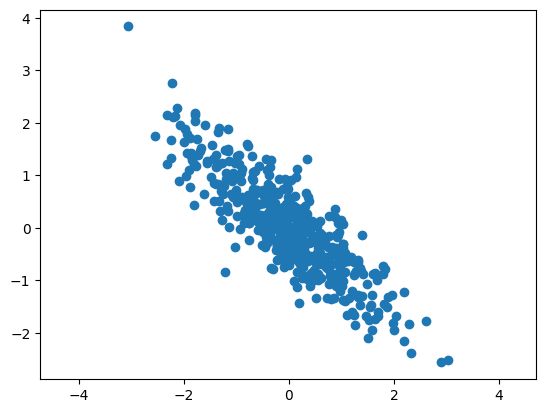

In [86]:
X[:, 0] = - X[:, 0]
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

---
## Identificacion de Principal Components

In [87]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
print(pca.components_)

[[ 0.74062812 -0.67191517]
 [ 0.67191517  0.74062812]]


In [88]:
print(pca.explained_variance_)

[1.62123504 0.12581594]


In [89]:
print(pca.explained_variance_ratio_)

[0.92798382 0.07201618]


(np.float64(-3.36000306145041),
 np.float64(3.3314115919910354),
 np.float64(-2.881825799615855),
 np.float64(4.1556598184440166))

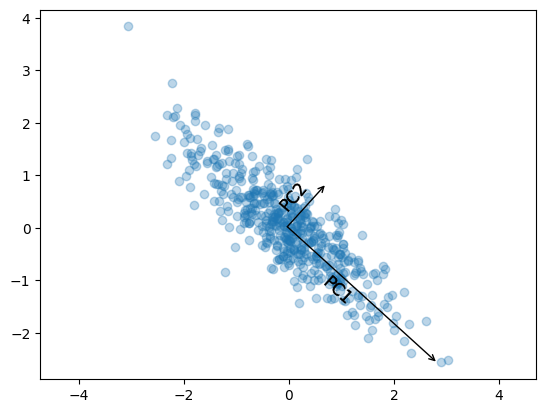

In [90]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)

for k, v in zip(pca.explained_variance_, pca.components_):
    vec = v * 3 * np.sqrt(k)
    
    ax = plt.gca()
    arrowprops=dict(arrowstyle='<-',
                    linewidth=1,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', pca.mean_, pca.mean_ + vec, arrowprops=arrowprops)
    ax.text(0.90, -1.2,'PC1', ha='center', va='center', rotation=-42, size=12)
    ax.text(0.1,0.6,'PC2', ha='center', va='center', rotation=50, size=12)
plt.axis('equal')

* **Dos componentes principales**.
* La **longitud** denota la **significancia** (importancia).


## 📐 Transformación Afín

Esta **transformación** de los ejes de datos a los **ejes principales** es como una **transformación afín**, lo que básicamente significa que se compone de una **traslación**, una **rotación** y un **escalado uniforme**.

---
## Dimensional Reducction con PCA

In [91]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
X.shape

(500, 2)

In [92]:
X_pca.shape

(500, 1)

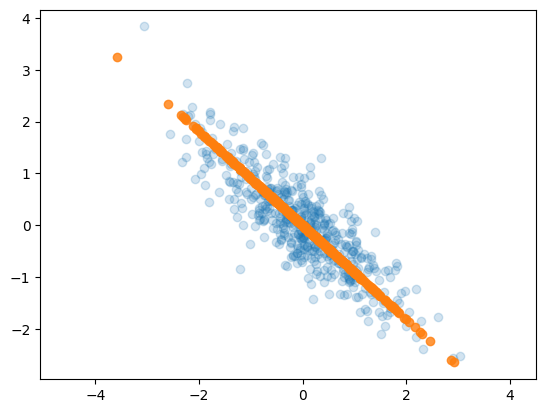

In [93]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

- Lo naranja es el PCA
- El azul claro es el data original